<a href="https://colab.research.google.com/github/Sanu1727/Credit-card-Fraud-Detection/blob/main/ML_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML-Credit Card /creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**FRAUD CASES AND GENUINE CASES**

In [ ]:
fraud_cases=len(data[data['Class']==1])
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [ ]:
non_fraud_cases=len(data[data['Class']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [ ]:
fraud=data[data['Class']==1]
genuine=data[data['Class']==0]
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**EXPLORATORY DATA ANALYSIS**

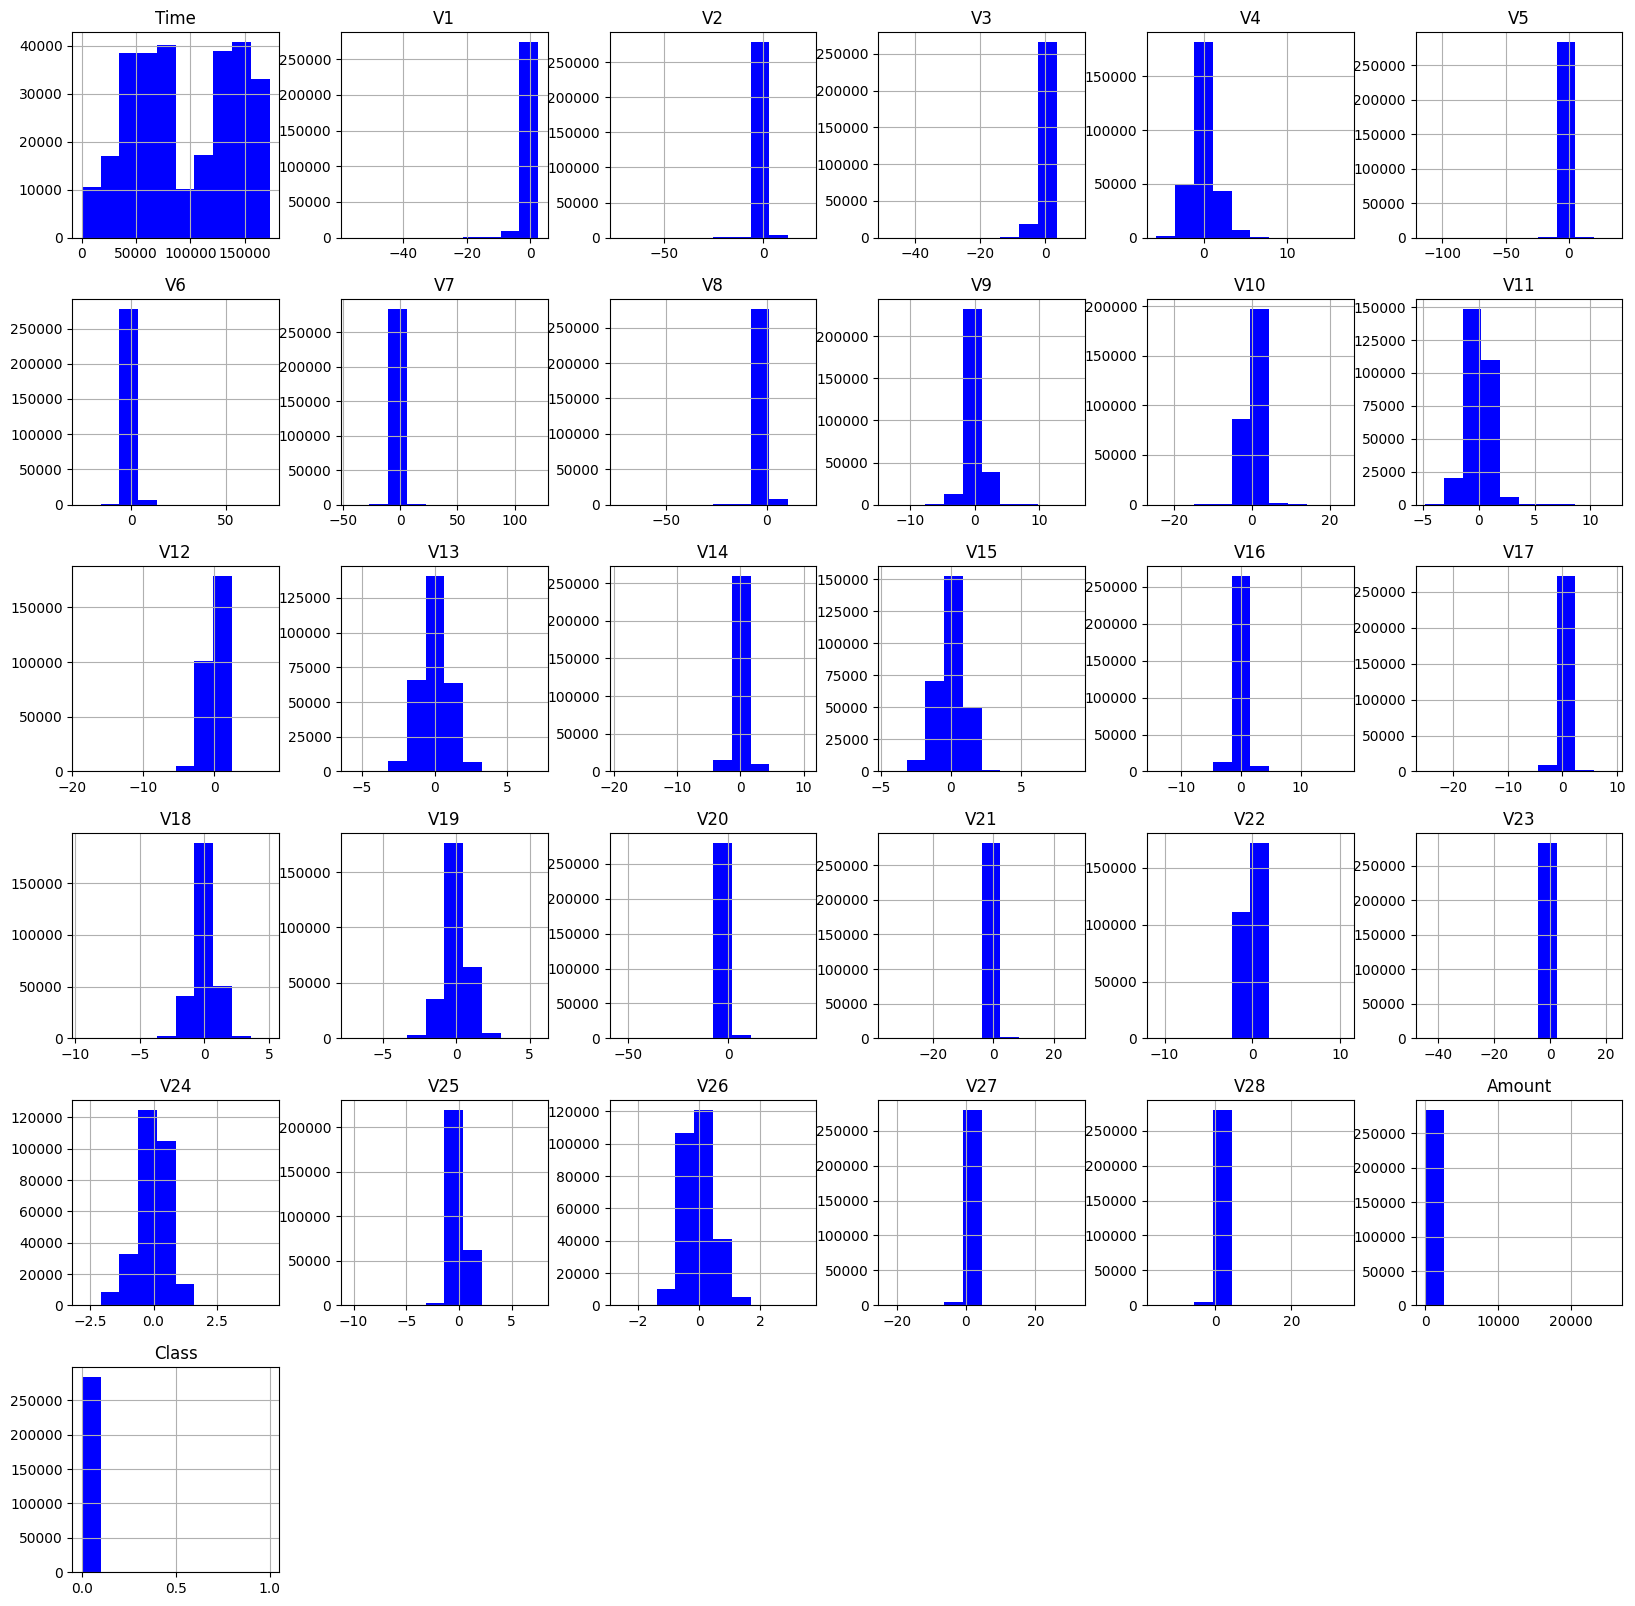

In [ ]:
data.hist(figsize=(20,20),color='blue')
plt.show()

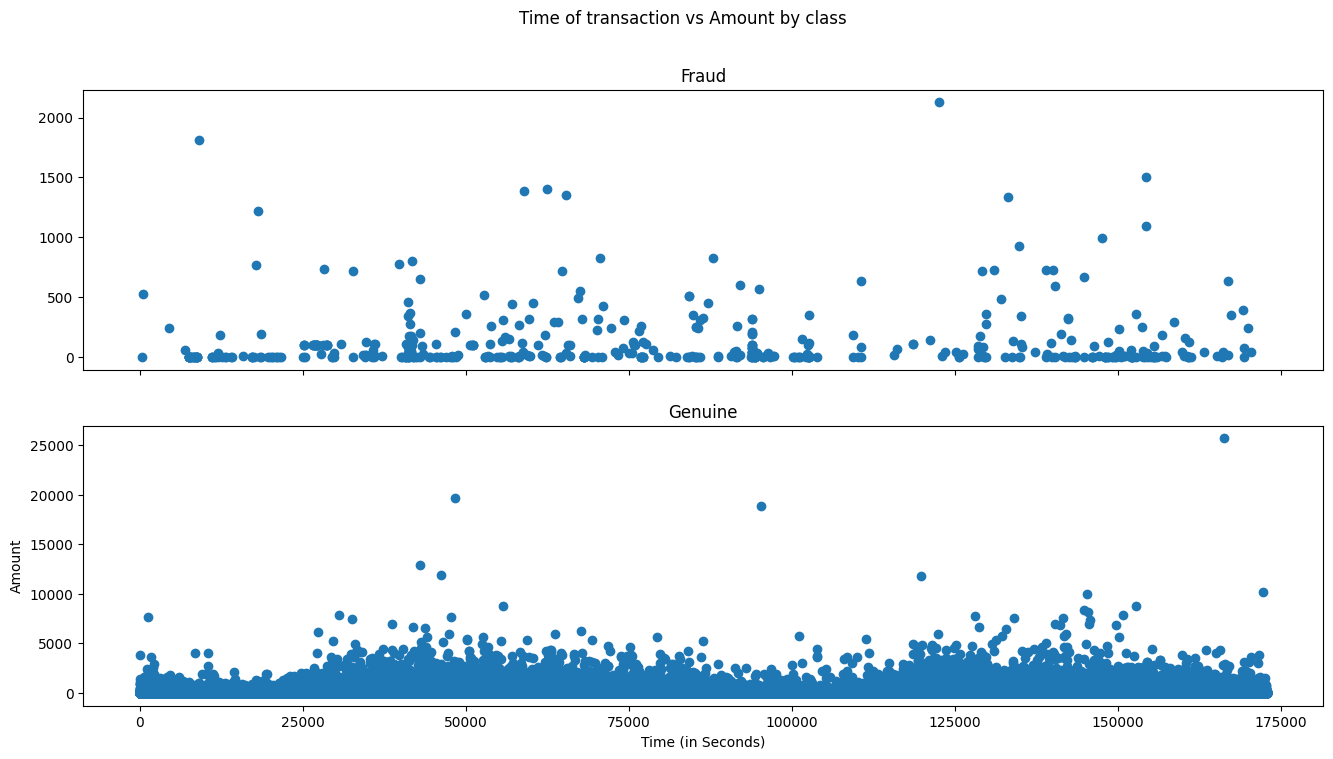

In [ ]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

**CORRELATION**

<Axes: >

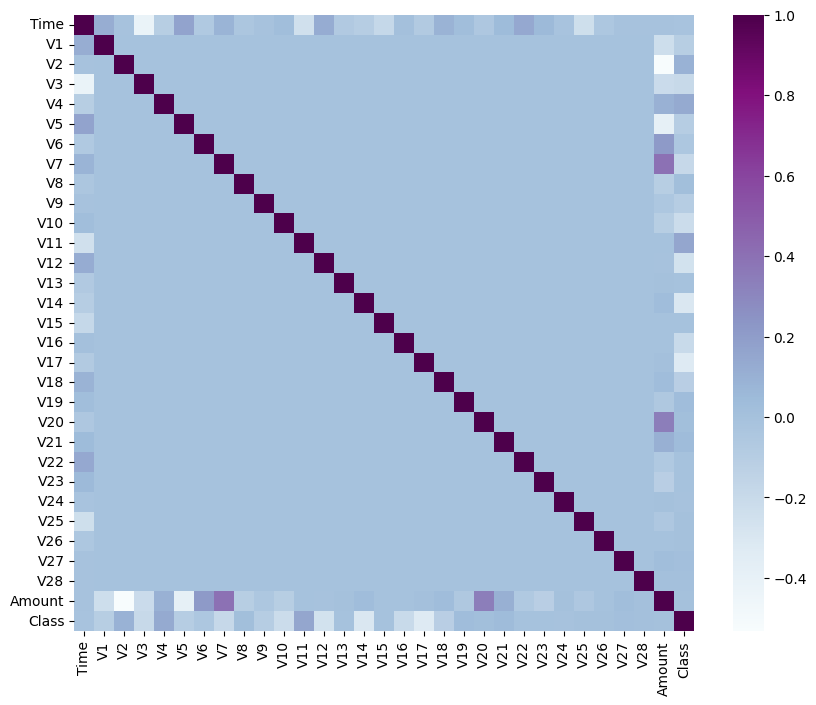

In [ ]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

In [ ]:
from sklearn.model_selection import train_test_split

**RANDOM FOREST CLASSIFIER**

In [ ]:
y= data['Class']
x= data.drop(columns=['Class'],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   35   112]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0, max_depth=10)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9995201479348805


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
X1=data.drop(['Class'],axis=1)

In [ ]:
y1=data['Class']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [ ]:
lr=LogisticRegression()
model2=lr.fit(X1_train,y1_train)

In [ ]:
from sklearn.metrics import accuracy_score
prediction2 = model2.predict(X1_test)
accuracy = accuracy_score(y1_test, prediction2)
print("Accuracy:", accuracy)



Accuracy: 0.9989934810341398


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X1 = data.drop(['Class'], axis=1)
y1 = data['Class']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=123)
lr = LogisticRegression()
model2 = lr.fit(X1_train, y1_train)
prediction2 = model2.predict(X1_test)
report = classification_report(y1_test, prediction2)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.75      0.69      0.72       160

    accuracy                           1.00     85443
   macro avg       0.87      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



**DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X2=data.drop(['Class'],axis=1)

In [ ]:
y2=data['Class']
dt=DecisionTreeRegressor()

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)
model3=dt.fit(X2_train,y2_train)

In [ ]:
prediction3=model3.predict(X2_test)
accuracy_score(y2_test,prediction3)

0.999204147794436

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X2 = data.drop(['Class'], axis=1)
y2 = data['Class']
dt = DecisionTreeClassifier()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=123)
model3 = dt.fit(X2_train, y2_train)
prediction3 = model3.predict(X2_test)
report = classification_report(y2_test, prediction3)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.76      0.77      0.76       160

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443



**KNN**

In [ ]:
features = data.drop(['Class'], axis = 1)
labels = pd.DataFrame(data['Class'])

feature_array = features.values
label_array = labels.values

In [ ]:
from sklearn.preprocessing import normalize


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)
X_train = normalize(X_train)
X_test=normalize(X_test)

In [ ]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [ ]:
X = data.iloc[:, [1, 2, 3]].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
ac = accuracy_score(y_test,y_pred)
print(ac)


0.9985253326779256


In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.59      0.17      0.26       101

    accuracy                           1.00     56962
   macro avg       0.79      0.58      0.63     56962
weighted avg       1.00      1.00      1.00     56962



**SUPPORT VECTOR MACHINE**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = data.drop(labels='Class', axis=1)
Y = data['Class']

X.shape, Y.shape

((284807, 30), (284807,))

In [ ]:
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [ ]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(xtrainS, ytrainS)

SVC(kernel='linear', probability=True)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svc_model.predict(xtestS)
accuracy = accuracy_score(ytestS, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9994265182636377


In [ ]:
from sklearn.metrics import classification_report
y_pred = svc_model.predict(xtestS)
report = classification_report(ytestS, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.80      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

